In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

In [2]:
import os

# Set up some variables for the training data paths
BASE_DATA_PATH = os.path.join('..', 'data')
TRAIN_DATA_PATH = os.path.join(BASE_DATA_PATH, 'train')

TRAINING_PROVIDERS_PATH = os.path.join(TRAIN_DATA_PATH, 'Train-1542865627584.csv')
TRAINING_INPATIENT_PATH = os.path.join(TRAIN_DATA_PATH, 
    'Train_Inpatientdata-1542865627584.csv')
TRAINING_OUTPATIENT_PATH = os.path.join(TRAIN_DATA_PATH, 
    'Train_Outpatientdata-1542865627584.csv')
TRAINING_BENEFICIARY_PATH = os.path.join(TRAIN_DATA_PATH, 
    'Train_Beneficiarydata-1542865627584.csv')

# Defines the default behavior for responding to values that do not exist in data set
DEFAULT_NA_VALUE = "None"

In [3]:
trn_tv = pd.read_csv(TRAINING_PROVIDERS_PATH)
trn_inpat = pd.read_csv(TRAINING_INPATIENT_PATH)
trn_outpat = pd.read_csv(TRAINING_OUTPATIENT_PATH)
trn_bene = pd.read_csv(TRAINING_BENEFICIARY_PATH)

In [17]:
trn_bene.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.837966,399.847296,1298.335104,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.483958,956.175202,2493.870104,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2300.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


# IPAnnualReimbursementAmt and OPAnnualReimbursementAmt has negative values. Correct these values to column mean

In [18]:
trn_benecln = trn_bene[['IPAnnualReimbursementAmt','OPAnnualReimbursementAmt']][trn_bene[['IPAnnualReimbursementAmt','OPAnnualReimbursementAmt']] >= 0].fillna(value = {'IPAnnualReimbursementAmt': trn_bene['IPAnnualReimbursementAmt'].mean(),'OPAnnualReimbursementAmt': trn_bene['OPAnnualReimbursementAmt'].mean()})
trn_bene['IPAnnualReimbursementAmt'] = trn_benecln['IPAnnualReimbursementAmt']
trn_bene['OPAnnualReimbursementAmt'] = trn_benecln['OPAnnualReimbursementAmt']
trn_bene.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.837966,399.847296,1298.335104,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.483958,956.175202,2493.870104,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2300.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [19]:
trn_inpat['In/Out'] = 'In'
trn_outpat['In/Out'] = 'Out'

In [20]:
trn_tmp = pd.concat([trn_inpat,trn_outpat], ignore_index = True)
trn_tmp

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,In/Out
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,In
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,In
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,In
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,In
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,In
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,NaN,0.0,NaN,NaN,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Out
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,NaN,0.0,NaN,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Out
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,NaN,0.0,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Out
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Out


In [21]:
trn_df = pd.merge(pd.merge(trn_tmp, trn_tv,how='inner', on=['Provider']),trn_bene, how='inner', on=['BeneID'])

In [22]:
trn_df.set_index(['Provider','In/Out','BeneID'],inplace=True)
trn_df.sort_values(['Provider','In/Out','BeneID'],inplace=True)
trn_df

ClaimID ClaimStartDt  ClaimEndDt  \
Provider In/Out BeneID                                           
PRV51001 In     BENE102690   CLM49733   2009-05-04  2009-05-18   
                BENE152088   CLM37205   2009-02-06  2009-02-06   
                BENE36012    CLM58316   2009-07-04  2009-07-08   
                BENE38773    CLM52334   2009-05-23  2009-05-25   
                BENE98831    CLM36844   2009-02-03  2009-02-08   
...                               ...          ...         ...   
PRV57763 Out    BENE92755   CLM417569   2009-06-15  2009-06-19   
                BENE92755   CLM607091   2009-09-30  2009-09-30   
                BENE97084   CLM386524   2009-05-29  2009-05-29   
                BENE97084   CLM491491   2009-07-26  2009-07-26   
                BENE97084   CLM662158   2009-11-02  2009-11-02   

                            InscClaimAmtReimbursed AttendingPhysician  \
Provider In/Out BeneID                                                  
PRV51001 In     BENE102690                   42000          PHY383193   
                BENE152088                    4000          PHY402229   
                BENE36012                    36000          PHY340163   
                BENE38773                    12000          PHY346762   
                BENE98831                     3000          PHY383193   
...                                            ...                ...   
PRV57763 Out    BENE92755                      400          PHY321072   
                BENE92755                       90          PHY321072   
                BENE97084                       60          PHY321072   
                BENE97084                      900          PHY321072   
                BENE97084                       70          PHY321072   

                           OperatingPhysician OtherPhysician AdmissionDt  \
Provider In/Out BeneID                                                     
PRV51001 In     BENE102690          PHY378091      PHY389113  2009-05-04   
                BENE152088          PHY329739            NaN  2009-02-06   
                BENE36012                 NaN            NaN  2009-07-04   
                BENE38773                 NaN            NaN  2009-05-23   
                BENE98831                 NaN            NaN  2009-02-03   
...                                       ...            ...         ...   
PRV57763 Out    BENE92755                 NaN      PHY321072         NaN   
                BENE92755                 NaN      PHY321072         NaN   
                BENE97084                 NaN      PHY321072         NaN   
                BENE97084                 NaN            NaN         NaN   
                BENE97084                 NaN            NaN         NaN   

                           ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
Provider In/Out BeneID                                                
PRV51001 In     BENE102690                 41401             1068.0   
                BENE152088                 80121             1068.0   
                BENE36012                  29623             1068.0   
                BENE38773                   0389             1068.0   
                BENE98831                   5362             1068.0   
...                                          ...                ...   
PRV57763 Out    BENE92755                    NaN                0.0   
                BENE92755                    NaN                0.0   
                BENE97084                    NaN                0.0   
                BENE97084                    NaN               70.0   
                BENE97084                   1745                0.0   

                           DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1  \
Provider In/Out BeneID                                                         
PRV51001 In     BENE102690  2009-05-18                245               4241   
                BENE152088  2009-02-06                062           

In [23]:
import matplotlib.pyplot as mpl
%matplotlib inline

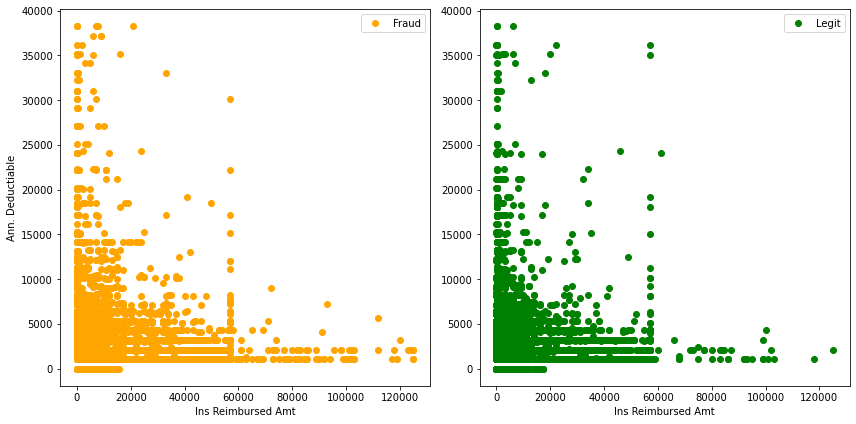

In [24]:
fig, ax = mpl.subplots(nrows=1, ncols=2, figsize=(12,6))
#ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax[0].scatter(trn_df['InscClaimAmtReimbursed'][trn_df['PotentialFraud'] == 'Yes'], trn_df['IPAnnualDeductibleAmt'][trn_df['PotentialFraud'] == 'Yes'], c='orange', label='Fraud')
ax[1].scatter(trn_df['InscClaimAmtReimbursed'][trn_df['PotentialFraud'] == 'No'], trn_df['IPAnnualDeductibleAmt'][trn_df['PotentialFraud'] == 'No'], c='g', label='Legit')


ax[0].set_xlabel('Ins Reimbursed Amt')
ax[1].set_xlabel('Ins Reimbursed Amt')
ax[0].set_ylabel('Ann. Deductiable')


#ax[1].set_ylabel('Ann. Deductible')

ax[0].legend(loc=0)
ax[1].legend(loc=0)

fig.tight_layout()

# Distribution of the Annual Deductible and Insurance Reimbursed amount is similar for potential fraud and legit providers.

In [25]:
from datetime import timedelta
trn_df['Age@Claim-Yrs'] = (pd.to_datetime(trn_df['ClaimStartDt'],format='%Y-%m-%d') - pd.to_datetime(trn_df['DOB'],format='%Y-%m-%d'))/timedelta(days=365)

In [26]:
trn_df['ClaimAging'] = (pd.to_datetime(trn_df['ClaimStartDt'],format='%Y-%m-%d') - pd.to_datetime(trn_df['AdmissionDt'],format='%Y-%m-%d'))/timedelta(days=1)
trn_df['ClaimDur-days'] = (pd.to_datetime(trn_df['ClaimEndDt'],format='%Y-%m-%d') - pd.to_datetime(trn_df['ClaimStartDt'],format='%Y-%m-%d') + timedelta(days=1))/timedelta(days=1)

In [15]:
trn_df

ClaimID ClaimStartDt  ClaimEndDt  \
Provider In/Out BeneID                                           
PRV51001 In     BENE102690   CLM49733   2009-05-04  2009-05-18   
                BENE152088   CLM37205   2009-02-06  2009-02-06   
                BENE36012    CLM58316   2009-07-04  2009-07-08   
                BENE38773    CLM52334   2009-05-23  2009-05-25   
                BENE98831    CLM36844   2009-02-03  2009-02-08   
...                               ...          ...         ...   
PRV57763 Out    BENE92755   CLM417569   2009-06-15  2009-06-19   
                BENE92755   CLM607091   2009-09-30  2009-09-30   
                BENE97084   CLM386524   2009-05-29  2009-05-29   
                BENE97084   CLM491491   2009-07-26  2009-07-26   
                BENE97084   CLM662158   2009-11-02  2009-11-02   

                            InscClaimAmtReimbursed AttendingPhysician  \
Provider In/Out BeneID                                                  
PRV51001 In     BENE102690                   42000          PHY383193   
                BENE152088                    4000          PHY402229   
                BENE36012                    36000          PHY340163   
                BENE38773                    12000          PHY346762   
                BENE98831                     3000          PHY383193   
...                                            ...                ...   
PRV57763 Out    BENE92755                      400          PHY321072   
                BENE92755                       90          PHY321072   
                BENE97084                       60          PHY321072   
                BENE97084                      900          PHY321072   
                BENE97084                       70          PHY321072   

                           OperatingPhysician OtherPhysician AdmissionDt  \
Provider In/Out BeneID                                                     
PRV51001 In     BENE102690          PHY378091      PHY389113  2009-05-04   
                BENE152088          PHY329739            NaN  2009-02-06   
                BENE36012                 NaN            NaN  2009-07-04   
                BENE38773                 NaN            NaN  2009-05-23   
                BENE98831                 NaN            NaN  2009-02-03   
...                                       ...            ...         ...   
PRV57763 Out    BENE92755                 NaN      PHY321072         NaN   
                BENE92755                 NaN      PHY321072         NaN   
                BENE97084                 NaN      PHY321072         NaN   
                BENE97084                 NaN            NaN         NaN   
                BENE97084                 NaN            NaN         NaN   

                           ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
Provider In/Out BeneID                                                
PRV51001 In     BENE102690                 41401             1068.0   
                BENE152088                 80121             1068.0   
                BENE36012                  29623             1068.0   
                BENE38773                   0389             1068.0   
                BENE98831                   5362             1068.0   
...                                          ...                ...   
PRV57763 Out    BENE92755                    NaN                0.0   
                BENE92755                    NaN                0.0   
                BENE97084                    NaN                0.0   
                BENE97084                    NaN               70.0   
                BENE97084                   1745                0.0   

                           DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1  \
Provider In/Out BeneID                                                         
PRV51001 In     BENE102690  2009-05-18                245               4241   
                BENE152088  2009-02-06                062           

Text(0.5, 0, 'Claim-Date offset from Admission-Date')

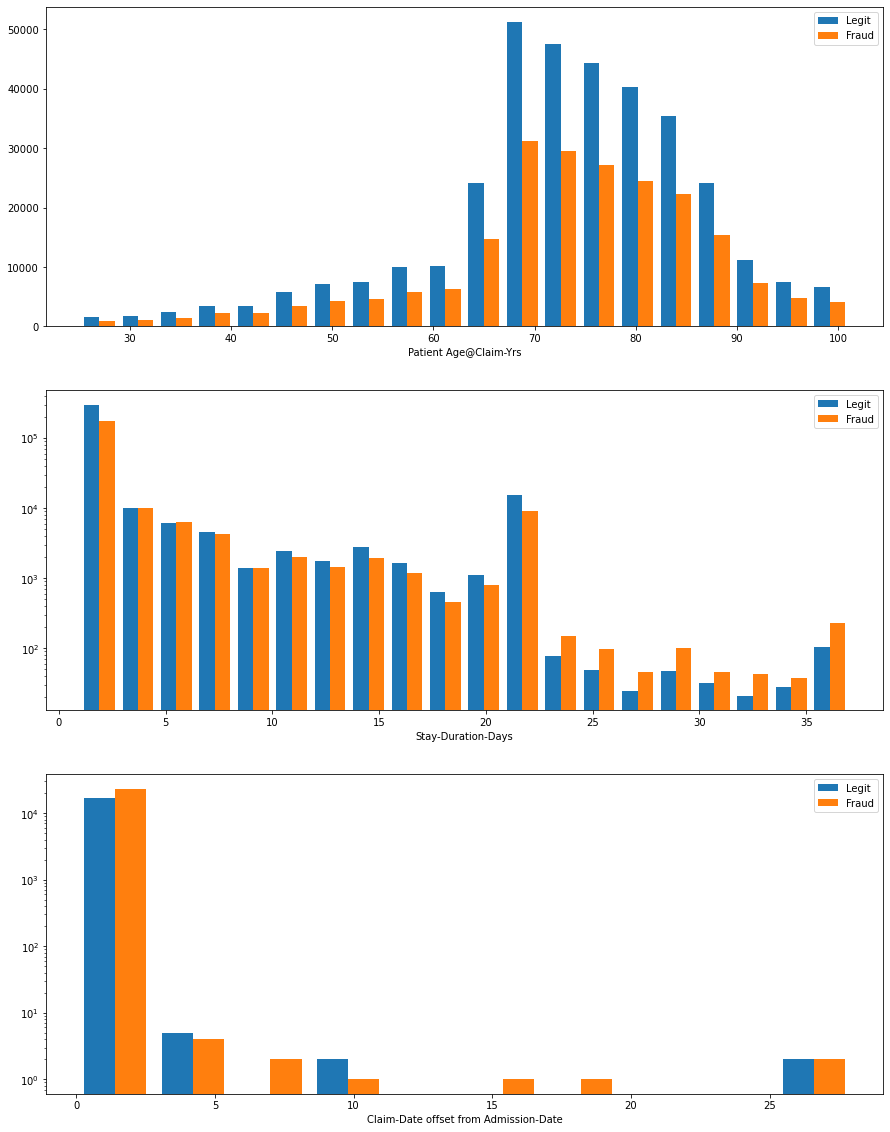

In [16]:
fig, ax = mpl.subplots(nrows=3, ncols=1, figsize=(15,20))
ax[0].hist((trn_df['Age@Claim-Yrs'][trn_df['PotentialFraud'] == 'No'], trn_df['Age@Claim-Yrs'][trn_df['PotentialFraud'] == 'Yes']), bins=20, histtype='bar', label=['Legit','Fraud'])

ax[1].hist((trn_df['ClaimDur-days'][trn_df['PotentialFraud'] == 'No'], trn_df['ClaimDur-days'][trn_df['PotentialFraud'] == 'Yes']), bins=20, histtype='bar', log=True, label=['Legit','Fraud'])

ax[2].hist((trn_df['ClaimAging'][trn_df['PotentialFraud'] == 'No'], trn_df['ClaimAging'][trn_df['PotentialFraud'] == 'Yes']), histtype='bar', log=True, label=['Legit','Fraud'])


for i in ax:
    i.legend(loc=0)

ax[0].set_xlabel('Patient Age@Claim-Yrs')
ax[1].set_xlabel('Stay-Duration-Days')
ax[2].set_xlabel('Claim-Date offset from Admission-Date')